# Neural Network Presentation
- E.g. 2 Layer Neural Network
    - Input Layer (not counted into # of layers)
        - $a^{[0]} = X = [x_{1}, x_{2}, x_{3}..., x_{n}]^{T}$
    - Hidden Layer
        - Hidden layers are not observable.
        - Assume the hidden layer has $n_{hidden}$ nodes, then for $i = 1:n_{hidden}$:
            - $a_{i}^{[1]} = f_{activation}(w_{i}^{[1]} a^{[0]} + b_{i}^{[1]})$
        - The output of the hidden layer will be:
            - $a^{[1]} = [a^{[1]}_{1}, a^{[1]}_{2}, a^{[1]}_{3}..., a^{[1]}_{n_{hidden}}]^{T}$
    - Output Layer
        - $a^{[2]} = f_{activation}(w^{[2]} a^{[1]} + b^{[2]})$
        
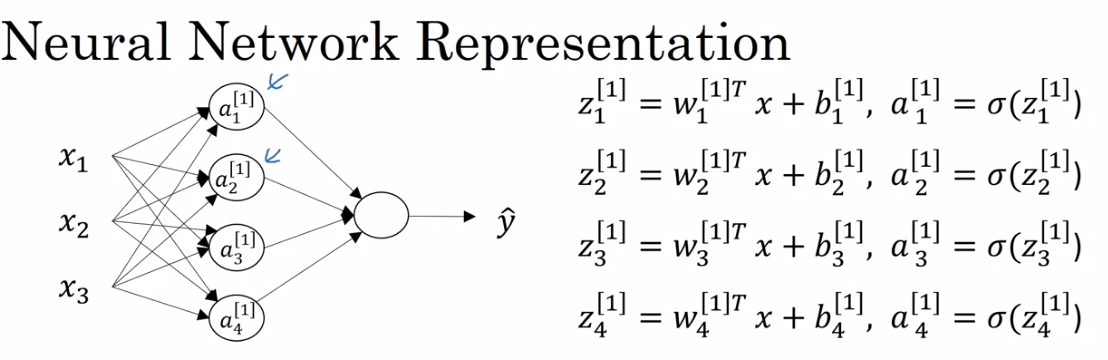

- To avoid unnecessary for-loops, we vectorize the fomular above as:
    - $z^{[1]} = W^{[1]} X + b^{[1]} = W^{[1]} a^{[0]} + b^{[1]}$
    - $a^{[1]} = f_{activation}(z^{[1]})$
    - $z^{[2]} = W^{[2]} a^{[1]} + b^{[2]}$
    - $a^{[2]} = f_{activation}(z^{[2]})$    

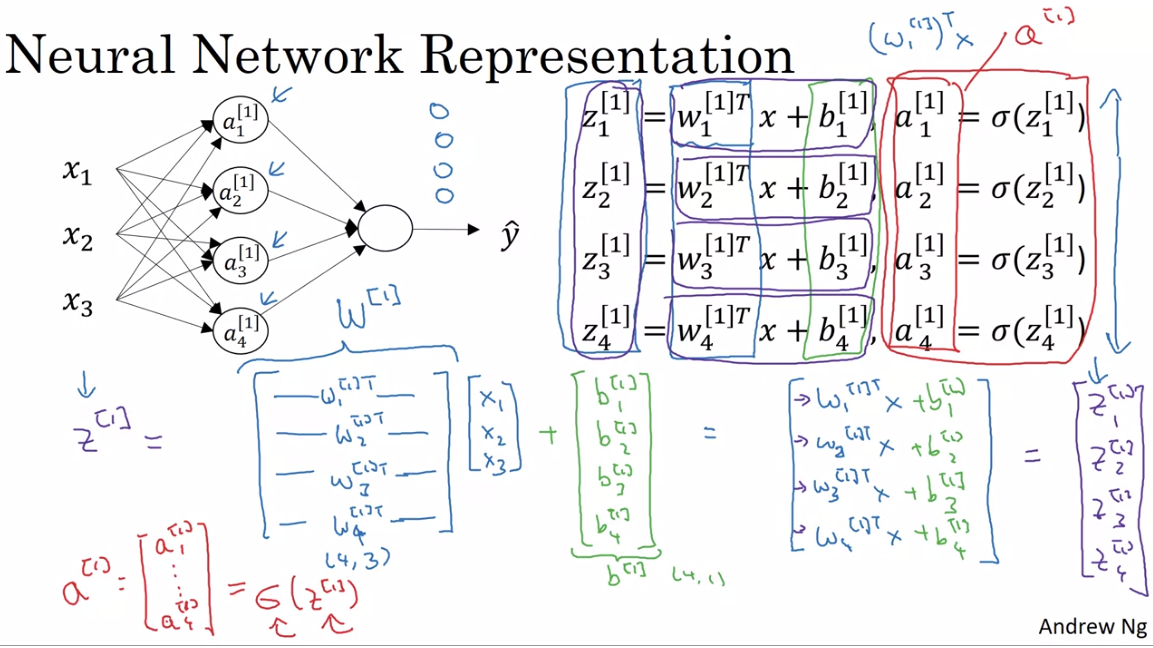

# Vecotorizing across Multiple Examples
- Now, consider a training set of multiple examples:
    - $X = [X^{(1)}, ..., X^{(m)}]$
- For the 2 layer neural network, we then have:
    - $z^{[1]} = W^{[1]}X + b^{[1]} = [z^{[1](1)}, ..., z^{[1](m)}]$
    - $A^{[1]} = f_{activation} (z^{[1]})$
    - $z^{[2]} = W^{[2]}A^{[1]} + b^{[1]} = [z^{[2](1)}, ..., z^{[2](m)}]$
    - $A^{[2]} = f_{activation} (z^{[2]})$
        - where $z^{[j](i)}$ represents the linear output of the $j^{th}$ layer for the $i^{th}$ example.
- To summarize, for $z^{[j]}$ and $A^{[j]}$:
    - Horizontal direction - $m$ training samples
    - Vertical direction - $n_j$ hidden units on layer $j$
    
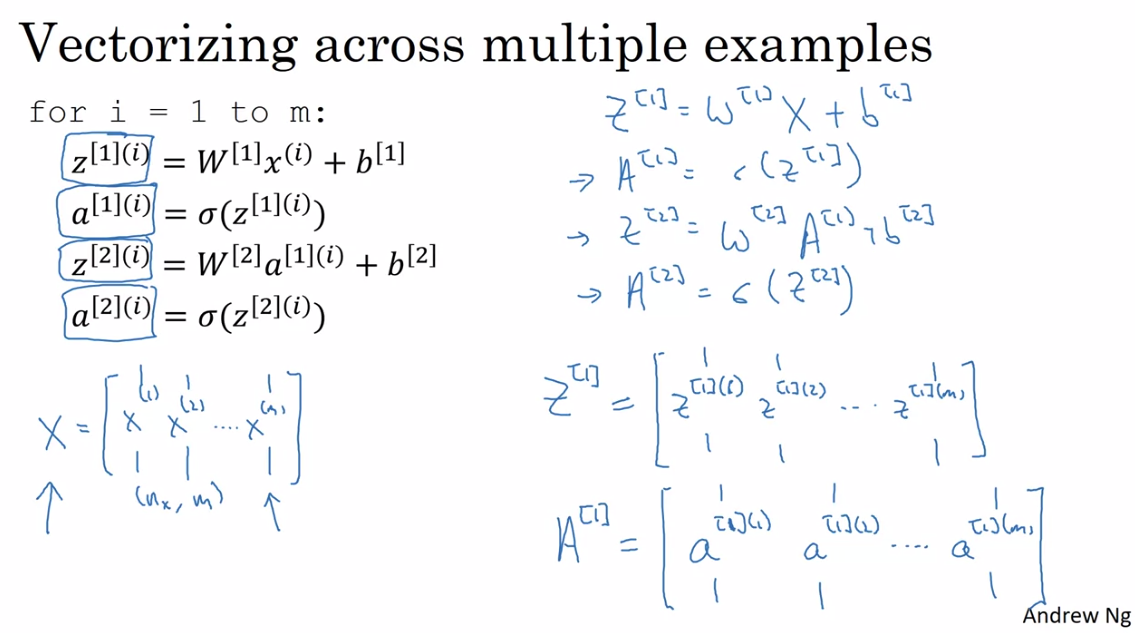

# Activation Functions
- Previously, we've always assumed to be using the sigmoid function as the activation function.
- However, there are way much more activation functions to consider.
    - E.g. The $tanh$ function has almost always been better than the sigmoid function.
        - The $tanh$ function has the mean of outputs closer to 0, and so it centers the data better for the next layer.
        - The only exception is for the output layer if we want to have $y \in \{0, 1\}$
- The **ReLU** (Rectified Linear Unit) function has become the default activation function for most people.
    - The disadvantage of ReLU is that it has derivative of 0 when $z < 0$.
    - To address this issue, we have the **Leaking ReLU** function.
        
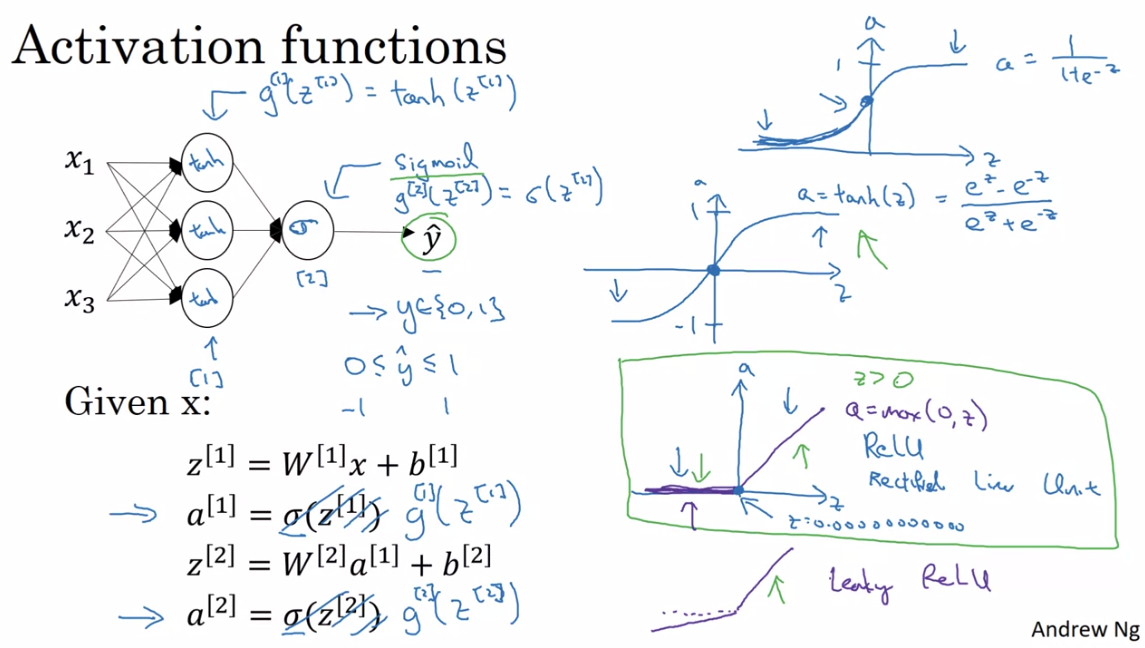

# Why Do You Need Non-Linear Activation Functions?
- Generally, hidden layers will be essentially useless if all hidden units use linear activation functions, as any combinations of linear function will itself be a linear function.

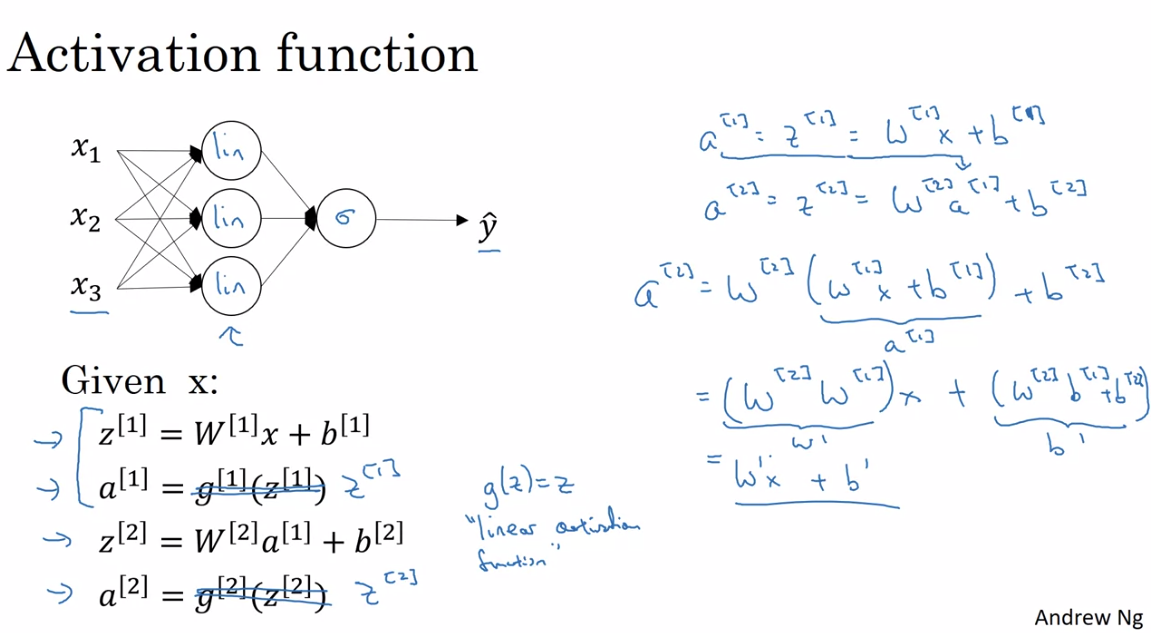

# Derivatives of Activation Functions
- **Sigmoid** activation function
    - $g(z) = \frac{1}{1+e^{-z}}$
    - $g'(z) = \frac{e^{-z}}{(1+e^{-z})^{2}} = \frac{1}{1+e^{-z}} (1 - \frac{1}{1+e^{-z}}) = g(z)(1 - g(z))$
- **Tanh** activation function
    - $g(z) = tanh(z)$
    - $g'(z) = 1 - (tanh(z))^{2}$
- **ReLU** activation function
    - $g(z) = max(0, z)$
    - $g'(z) = \left\{\begin{array}{ll}0 & \quad z \leq 0 \\1 & \quad z > 0 \\undefined & \quad z = 0\end{array}\right.$
- **Leaky ReLU** activation function
    - $g(z) = max(0.01z, z)$
    - $g'(z) = \left\{\begin{array}{ll}0.01 & \quad z \leq 0 \\1 & \quad z > 0 \\undefined & \quad z = 0\end{array}\right.$

# Gradient Descent for Neural Networks
- Assuming a 2-layer neural network, we have:
    - Parameters:
        - $W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}$
    - Cost Function:
        - $J(W^{[1]}, b^{[1]}, W^{[2]}, b^{[2]}) = \frac{1}{m} \sum_{i=1}^{m} l(\hat y, y) = \frac{1}{m} \sum_{i=1}^{m} l(a^{[2]}, y)$
- Gradient Descent
    - Repeat for $n_{iterations}$ times:
        - Compute predictions $(\hat y^{i}, i=1, ..., m)$
        - $dW^{[j]} = \frac{\partial J}{\partial W^{[j]}}$
        - $db^{[j]} = \frac{\partial J}{\partial b^{[j]}}$
        - $W^{[j]} := W^{[j]} - \alpha dW^{[j]}$
        - $b^{[j]} := b^{[j]} - \alpha db^{[j]}$
- Formulas for Computing Derivatives
    - Forward Propagation (assuming binary classification)
        - $Z^{[1]} = W^{[1]} X + b^{[1]}$
        - $A^{[1]} = g^{[1]}(Z^{[1]})$
        - $Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$
        - $A^{[2]} = g^{[2]}(Z^{[2]}) = \sigma (Z^{[2]})$
    - Back Propagation
        - $dZ^{[2]} = A^{[2]} - Y$, where $Y = [y^{(1)}, ..., y^{(m)}]$
        - $dW^{[2]} = \frac{1}{m} dZ^{[2]}A^{[1]T}$
        - $db^{[2]} = \frac{1}{m} np.sum(dZ^{[2]}, axis=1, keepdims=True)$
        - $dZ^{[1]} = W^{[2]T} dZ^{[2]} \odot g^{[1]'}Z^{[1]}$, where $\odot$ represents element-wise product
        - $dW^{[1]} = \frac{1}{m} dZ^{[1]}X^{T}$
        - $db^{[1]} = \frac{1}{m} np.sum(dZ^{[1]}, axis=1, keepdims=True)$

# Random Initialization
- We cannot initializing all $W^{[j]}$ as all 0s for neural networks:
    - In that case, all the hidden units will be learning the same function, no matter how many iterations of gradient descent we run.
    - This is called the symmetry problem.
- To **break symmetry**, we initialize parameters randomly, for example:
    - $W^{[1]} = np.random.randn((2,2)) * 0.01$
    - $b^{[1]} = np.zero((2,1))$
    - $W^{[2]} = np.random.randn((2,2)) * 0.01$
    - $b^{[2]} = np.zero((2,1))$
- Note here we usually initialize parameters with relatively **small** values (so we have $* 0.01$ above), 
    - if we initialize with large values of $W^{[j]}$, $z^{[j]} = W^{[j]} A^{[j-1]} + b^{[j]}$ would be large, and $g(z^{[1]})$ might be extreme values that make gradient descent slow. 
    - E.g. Extreme values on the two sides of the sigmoid function has slopes close to 0.